# Project II  Kohonen algorithm (SOM)
## Author : Daniel Berkovich
A implamentation of SOM algorithm. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def draw(w1, w2, iterate, radius, l_rate, is_line=True):
  fig, ax = plt.subplots()
  if is_line:
    plt.plot(w1, w2, color='blue', marker='o', linestyle='dashed', 
             linewidth=2, markersize=12)
  else:
    plt.plot(w1, w2, color='red', linestyle='None', marker='o', markersize=12)
  ax.set(xlabel='X', 
         ylabel='Y',
         title='Kohonen algorithm (Iter: {}, Radius: {:.3f}, L_rate:{:.3f})'
         .format(iterate, radius, l_rate))
  ax.grid()
  plt.show()

In [35]:
def euclidean_dist(x, y, node_id):
  return np.sqrt((x[node_id] - x)**2 + (y[node_id] - y)**2)

In [36]:
def bmu(x ,y, node_id):
  ed = euclidean_dist(x, y, node_id)
  ed[node_id] = np.inf
  argmin_x = np.argmin(ed).item()
  return argmin_x

In [37]:
def choose_randomly(x):
  rnd = np.where(x == np.random.choice(x))
  return rnd if type(rnd) is not tuple else int(rnd[0][0])

In [38]:
def ord_vector(x, y, node_id):
  by_euclid_dist = -1 * euclidean_dist(x ,y, node_id)
  x_ord_idx = np.argsort(by_euclid_dist)
  y_ord_idx = np.argsort(by_euclid_dist)
  return x[x_ord_idx], y[y_ord_idx]

In [39]:
def update_neighbourhood(x, y, bmu_node, node_id, radius, alpha):
  ed = euclidean_dist(x, y, bmu_node)
  for idx, r in enumerate(ed):
    if -radius <= r <= radius:
      x[idx] += alpha * (x[node_id] - x[idx])
      y[idx] += alpha * (y[node_id] - y[idx])
  return x, y

# Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.

In [40]:
def train(x, y, max_iter, radius, alpha, is_line=True):
  init_alpha = alpha
  init_radius = radius
  for step in range(max_iter):
    choice_idx = choose_randomly(x)
    best_match = bmu(x, y, choice_idx)
    x, y = update_neighbourhood(x, y, best_match, choice_idx, radius, alpha)
    x, y = ord_vector(x, y, choice_idx)
    alpha = init_alpha * np.exp(-step/max_iter)
    radius  = init_radius * np.exp(-step/max_iter)
    if step == 100:
      draw(x, y, step, radius, alpha, is_line)
    elif (step+1) % 500 == 0: 
      draw(x, y, (step+1), radius, alpha, is_line)
  return x, y

## 1.First sample - Uniform Distribiotions
### Fit a line of neurons to a disk using the algorithm

* Range: 0 <= x, y <= 1
* Max iteretion: 3000
* Initial neighbour distance: 15
* Initial learning rate: 0.3

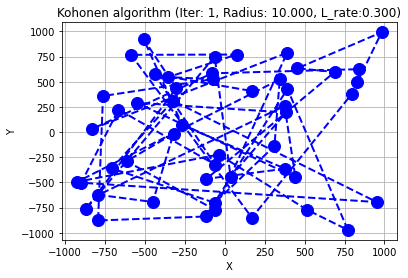

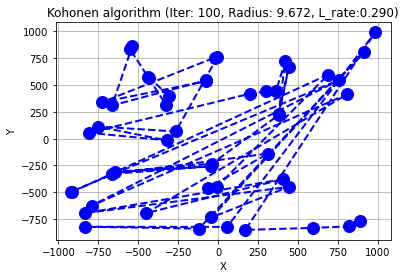

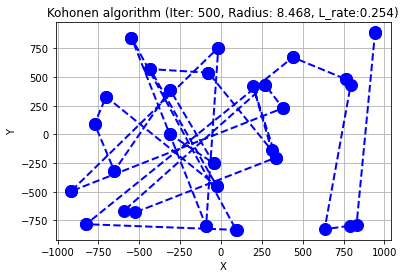

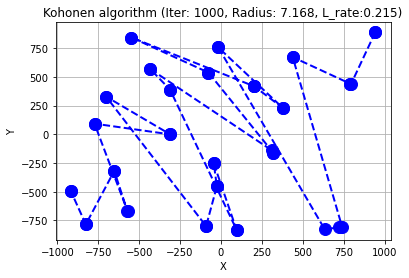

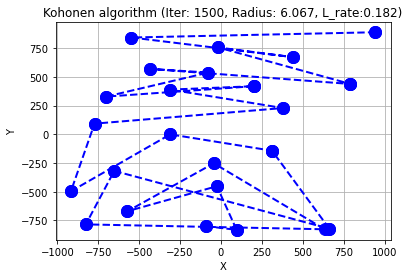

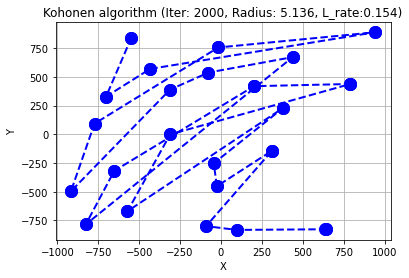

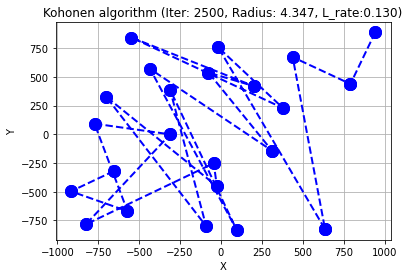

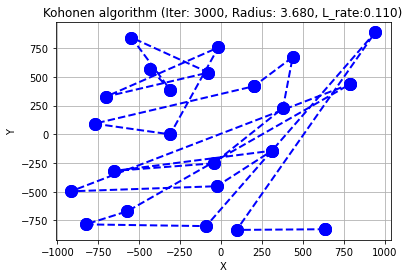

(array([ 636.27819568,  636.27819193,  636.27199556,   95.64912004,
          95.64912004,  943.45440203,  943.45440203,  -91.03992556,
         -91.03992556, -826.70515301, -826.705153  , -571.78812659,
        -571.78812675,  791.54263892,  791.54263891,  791.54263891,
        -917.78307345, -917.78307344,  -25.25920528,  -25.25920528,
         311.91492882,  311.91492882,  311.91492879, -652.75112159,
        -652.75112159,  -44.38795357,  -44.38795357,  378.87982157,
         378.87982157,  438.3601271 ,  438.3601271 ,  201.84319196,
         201.84319196,  201.84319194, -773.56613322, -773.56613322,
        -310.63031325, -310.63031325,  -16.44091036,  -16.44091036,
        -702.75990958, -702.75990958,  -76.6744288 ,  -76.6744288 ,
        -547.72304092, -547.72304092, -311.60509774, -311.60509773,
        -433.57865564, -433.57865564]),
 array([-8.26820356e+02, -8.26820356e+02, -8.26821544e+02, -8.32789239e+02,
        -8.32789239e+02,  8.89358467e+02,  8.89358467e+02, -7.996620

In [41]:
x = np.random.uniform(-1000,1000,50)
y = np.random.uniform(-1000,1000,50)
step_max = 3000
radius = 10
alpha = 0.3
draw(x, y, 1, radius, alpha)
train(x, y, step_max, radius, alpha)

# Non-Uniform Distribiotions- When using  many neurons :

  *  Range: -1000 < x, y < 1000
  *  Max iteretion: 2000
  *  Initial neighbour distance: 200
  *  Initial learning rate: 0.4


In [46]:
def rand_non_uniform():
  x1 = np.random.uniform(-1000,0,25)
  y1 = np.random.uniform(0,1000,25)

  x2 = np.random.uniform(-1000,0,25)
  y2 = np.random.uniform(-1000,0,25)

  x3 = np.random.uniform(0,1000,25)
  y3 = np.random.uniform(-1000,0,25)

  x4 = np.random.uniform(0,1000,25)
  y4 = np.random.uniform(0,1000,25)

  x = np.append(x1, x2)
  x = np.append(x, x3)
  x = np.append(x, x4)
  
  y = np.append(y1, y2)
  y = np.append(y, y3)
  y = np.append(y, y4)
  return x, y

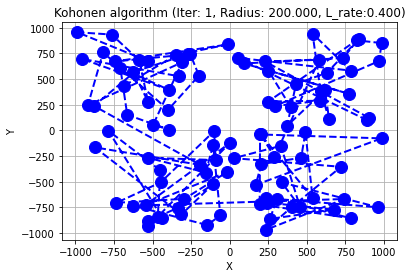

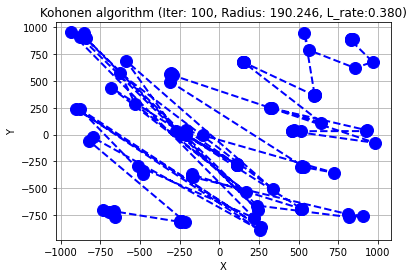

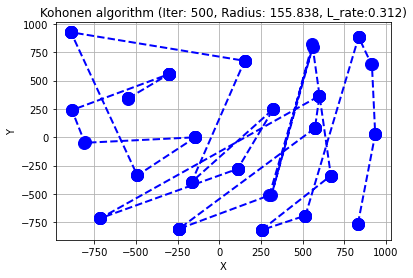

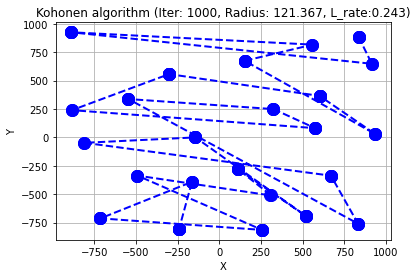

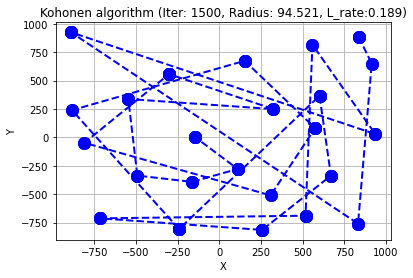

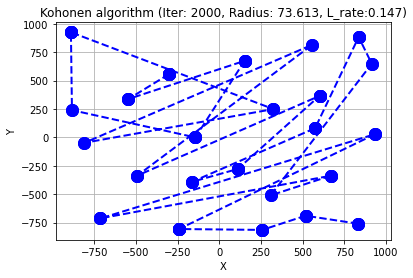

(array([ 831.69286716,  831.69285358,  831.69285264,  516.59328187,
         516.59328187,  516.59328187,  516.59328187,  516.59328187,
         256.39716538,  256.39716538,  256.39716538,  256.39716538,
         256.39716538, -242.31060668, -242.31060668, -242.31060668,
        -242.31060668, -242.31060668, -242.31060668, -242.31060668,
        -242.31060668,  935.15939874,  935.15939744,  935.15939733,
        -713.57439211, -713.57439212, -713.57439211, -713.57439211,
         669.11882587,  669.11882587,  669.11882587,  669.11882587,
         307.33906016,  307.29338588,  914.10498366,  914.08609637,
         835.48546418,  835.48546418,  835.48546418,  835.48546418,
         574.08311102,  574.083111  ,  574.083111  ,  574.083111  ,
         574.083111  , -164.92591708, -164.92595884, -164.92598816,
         109.83269211,  109.83269211,  109.83269211,  109.83269211,
         109.83269211,  109.83269211,  600.64142665,  600.64142665,
         600.64142665,  600.64142665,  600.64142

In [47]:
x, y = rand_non_uniform()
step_max = 2000
radius = 200
alpha = 0.4
draw(x, y, 1, radius, alpha)
train(x, y, step_max, radius, alpha)

## 2.Fitting a circle of neurons 


   *  Range: -1000 < x, y < 1000
   *  <x.y> | 1<= x^2 +y^2 <= 2
   *  Radius Range: 500 < r <1000
   *  Max iteretion: 3000
   *  Initial neighbour distance: 30
   *  Initial learning rate: 0.3
  

In [48]:
def make_circle(s_range, e_range, amount=100):
  ang = np.random.uniform(0, 2*np.pi, amount)
  r = np.random.uniform(s_range, e_range, amount)
  y = r * np.sin(ang)
  x = r * np.cos(ang)
  return x, y

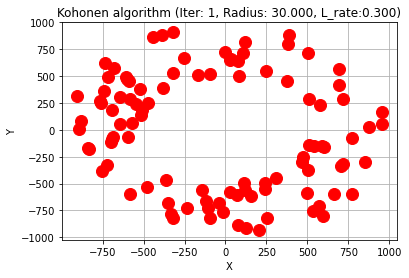

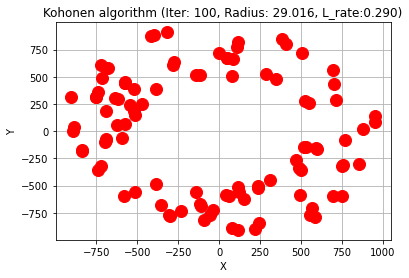

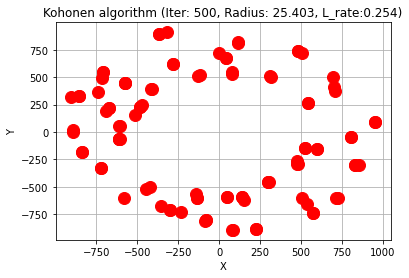

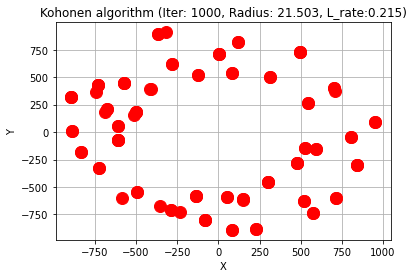

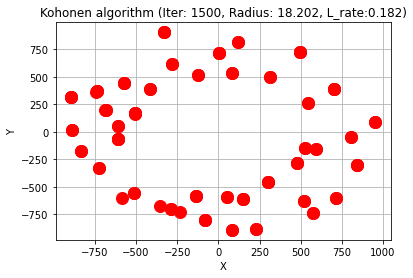

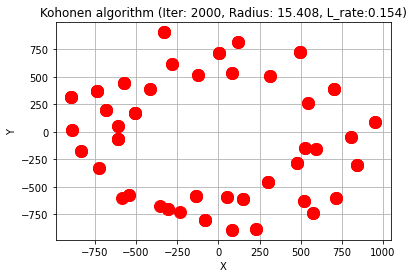

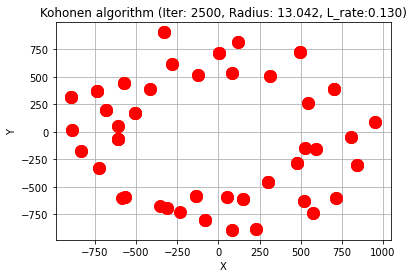

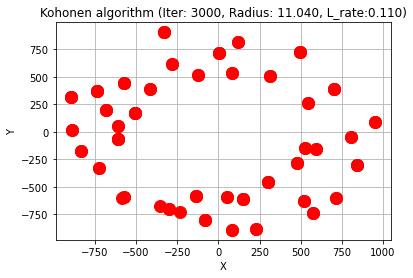

In [49]:
x, y = make_circle(500, 1000) 
step_max = 3000
radius = 30
alpha = 0.3
draw(x, y, 1, radius, alpha, False)
x, y = train(x, y, step_max, radius, alpha, is_line=False)